# 2 Explorative Visual Analysis

# 01 Import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [7]:
# Check matplotlib version
matplotlib.__version__

'3.9.2'

In [9]:
# Ensuring the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# 02 Import files

In [11]:
path=r'/Users/DA77/CF/Open_Data_Project/'

In [13]:
insurance=pd.read_csv(os.path.join(path, '02_Data','2.01_Original_Data', 'insurance.csv'))

# 03 Exercises 6.02

## Task 2. Variables for EDA
Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [12]:
# The dataset does not have redundance variables since only the defining gender, age, location and health variables are left.
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Task 3. Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [14]:
# Create a subset dataframe excluding categorical columns for correlation heatmap
sub_heatmap= insurance[['age', 'bmi', 'children', 'charges']]

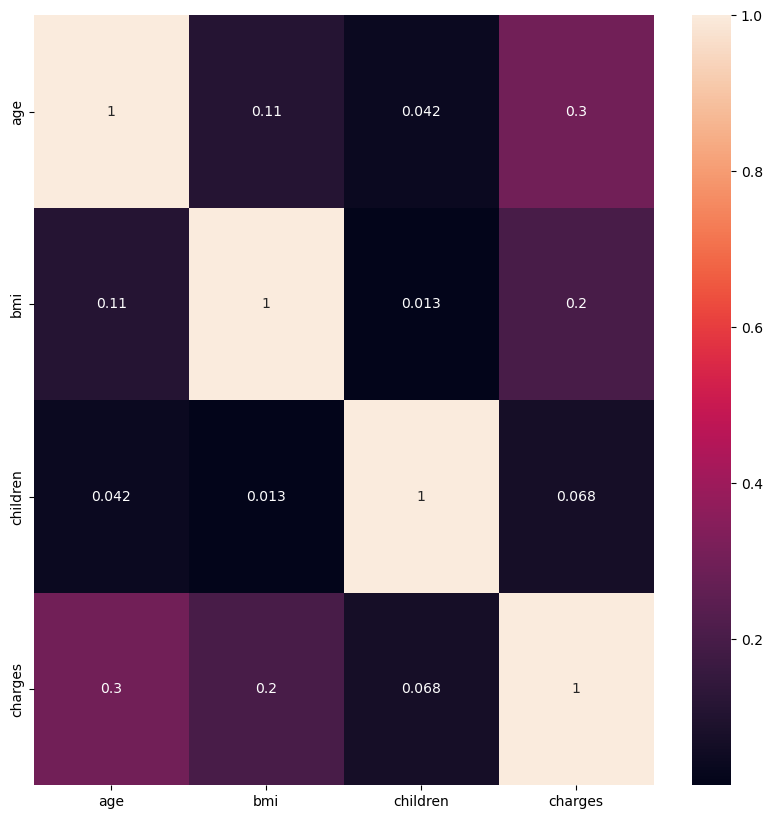

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_heatmap.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

**Intepretation**. The variables show suprising non to weak linear correlation with charges (main independent variable of interest). 
Age has a weak positive correlation with charges (=0.3) whereas bmi and children have very weak relationships with charges according to pearson' correlation scale. 

Also, looking at the interaction of how the other variables interact, it shows that no orrelation is stronger than 0.3. 

This model assumes a linear relationship though which could be inaccurate.

In [38]:
# Save the heatmap 
f.savefig(os.path.join(path,'04_Analysis','4.02_EDA_Visuals','correlation_heatmap.png'), dpi=300, bbox_inches='tight')

## Task 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

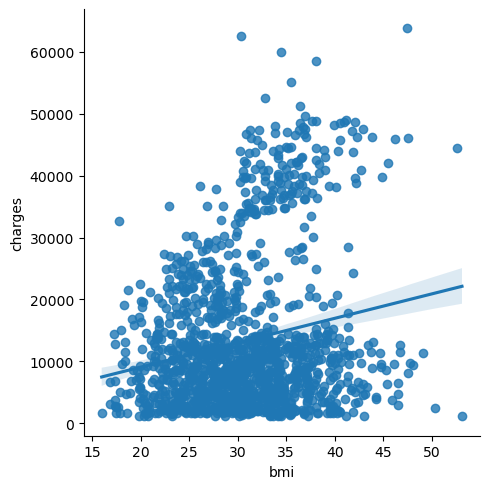

In [15]:
# Create a scatterplot for "age" and "charges" columns in seaborn - had the strongest correlation (though still weak)
g=sns.lmplot(x = 'bmi', y = 'charges', data = insurance)
plt.show()

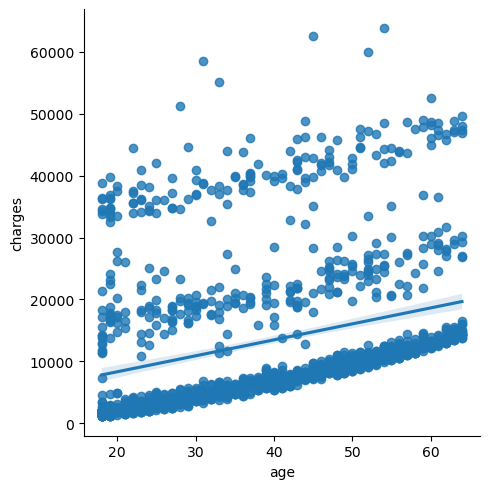

In [46]:
# Create a scatterplot for "age" and "charges" columns in seaborn - had the strongest correlation (though still weak)
g=sns.lmplot(x = 'age', y = 'charges', data = insurance)
plt.show()

In [48]:
# Save scatterplot
g.savefig(os.path.join(path,'04_Analysis','4.02_EDA_Visuals','scatterplot_age_charges.png'), dpi=300, bbox_inches='tight')

**Interpretation**. There is positve correlation between age and charges but you can see that the correlation isn't strong. As ages increases, the charges go up. However, each age level has datapoint across differenct charges which makes the relationship is not purely linear - hence the correlation coefficient is weak. 

## Task 5. Create a pair plot of the entire data set (excl. cateogrical by default)
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [63]:
# Pair plot for whole data set(adding all variables) - only the numerical variables will show by default
sub_pp= insurance[['age', 'sex','bmi', 'children', 'smoker','region', 'charges']]

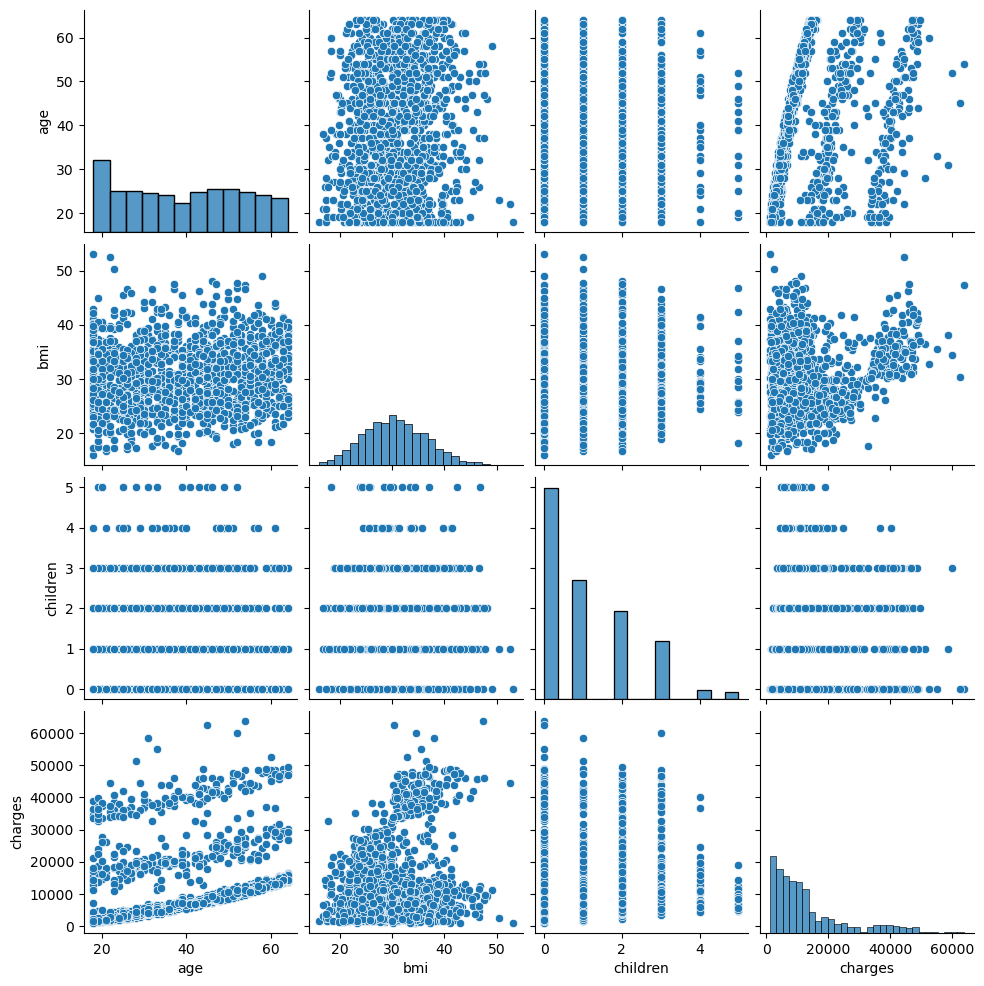

In [55]:
# Create a pair plot 
h = sns.pairplot(sub_pp)

**Interpretation**  
**BMI and charges.** Some sort of linearity is visible, but not completely which explain why the correlation coefficient was weak. This is quite surprising and contradicts the common preconception. Though higher BMI does positively correlate with higher charges, it is also visible that people with a lower BMI can still have high charges. This means that there other factors causing higher charges. This should be further examined as it is a core assumption in healthcare. 

**Age and charges** In the scatterplot, threelines become visible which each follow a positive linear relationship. Meaning that age has some sort of influence of charges but there must be additional variables. This should be further examined. 

**Other variables** share no visible relationship with other variables, hence the focus of analysis should be on age+charges and BMI+charges. 

**Skipped categeorical**. The correlation heatmap skipped the categorical variables. Below, the are added with hues/colors. It is apparent that sex, and region dont  seem to have a relationship with charges. However, there is strong connection to "smoking": it is apparent that smoking seems to be able to explain why age+ charges ans BMI+charges arent fully linear - adding smoking to the relationship in both cases increases charges strongly from the visuals. Also smokers with childrean have higher charges than non-smokers with children.

## Bonus: Pair plot (incl. cateogrical variables)

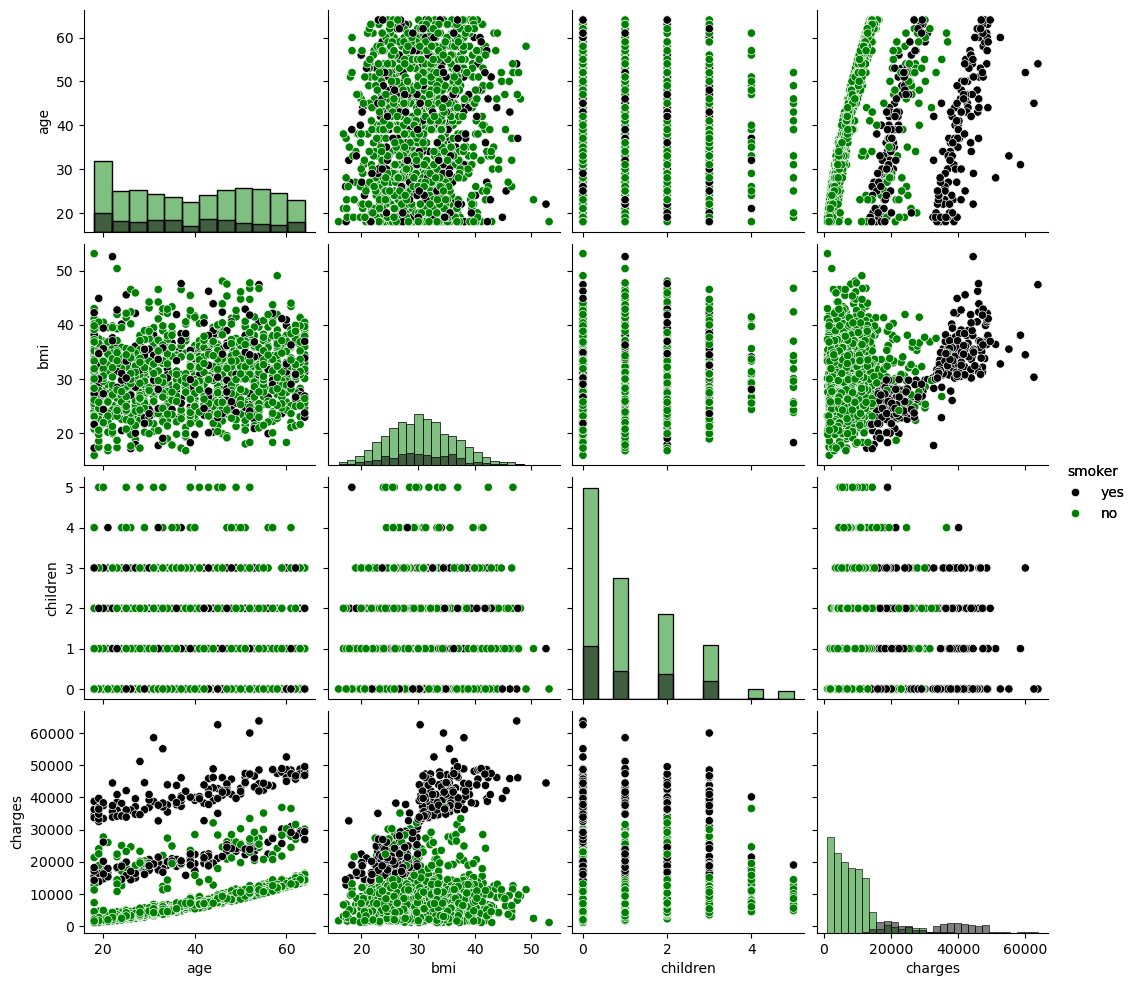

In [81]:
# Choose one categorical variable for hue
hue_var = "smoker"  # Change to "sex" or "region" as needed

# Define custom color palettes with correct string keys
custom_palettes = {
    "sex": {"male": "blue", "female": "red"},
    "smoker": {"yes": "black", "no": "green"},
    "region": {"northeast": "purple", "northwest": "orange", "southeast": "cyan", "southwest": "brown"}
}

# Temporarily convert categorical values to numeric, but store the mapping
temp_df = insurance.copy()
category_mapping = dict(enumerate(insurance[hue_var].astype("category").cat.categories))  # Map 0 → 'no', 1 → 'yes'
temp_df[hue_var] = temp_df[hue_var].astype("category").cat.codes  # Convert to numbers
temp_df[hue_var] = temp_df[hue_var].map(category_mapping)  # Convert numbers back to original category names

# Generate pair plot with the corrected hue mapping
g = sns.pairplot(temp_df, hue=hue_var, palette=custom_palettes[hue_var], diag_kind="hist")

# Ensure the legend appears
g.add_legend()

# Show the plot
plt.show()

# Save the plot
g.savefig(os.path.join(path,'04_Analysis','4.02_EDA_Visuals','pairplot_with_{hue_var}.png'), dpi=300, bbox_inches='tight')

Creating pair plot with hue = sex


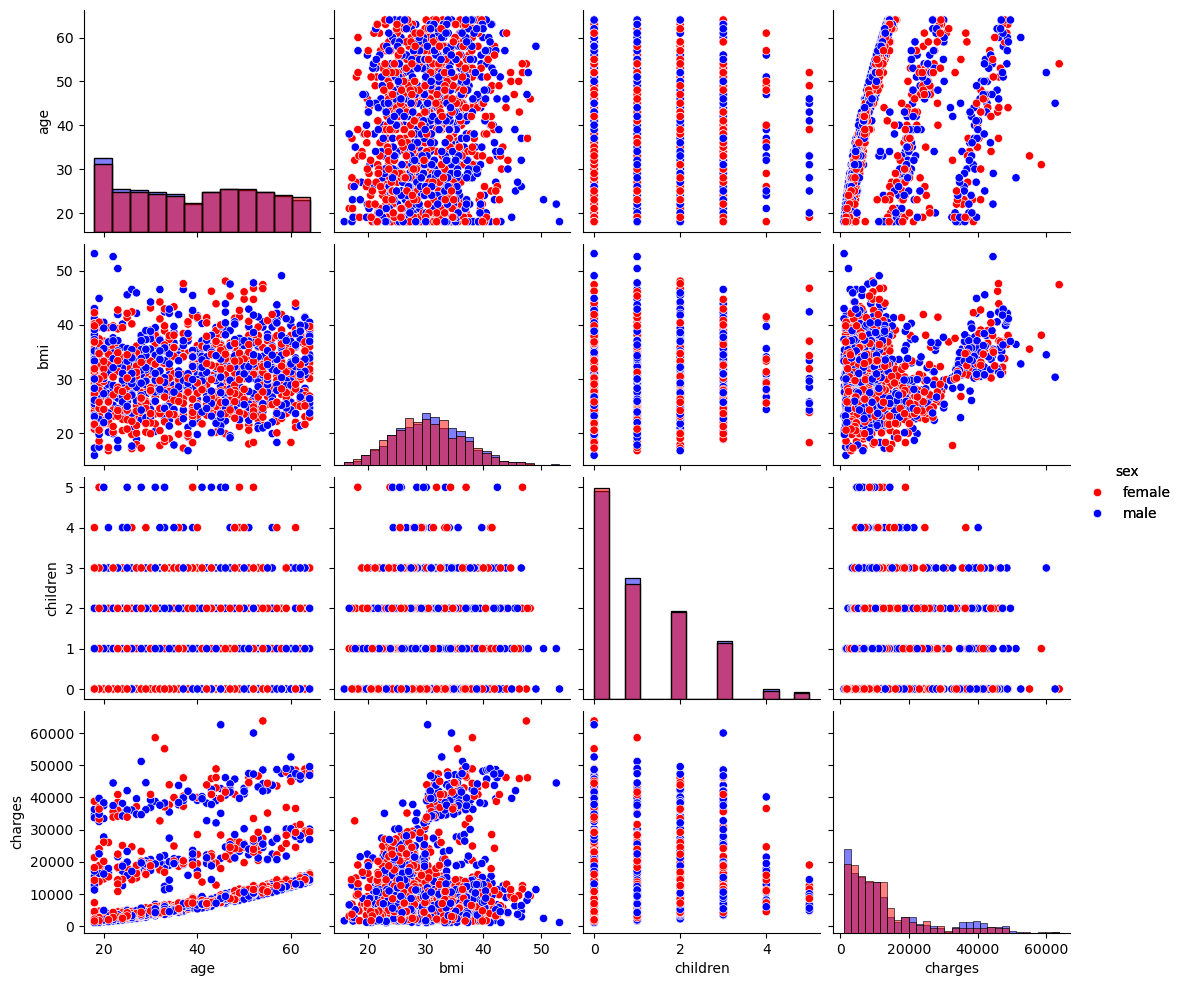

Creating pair plot with hue = smoker


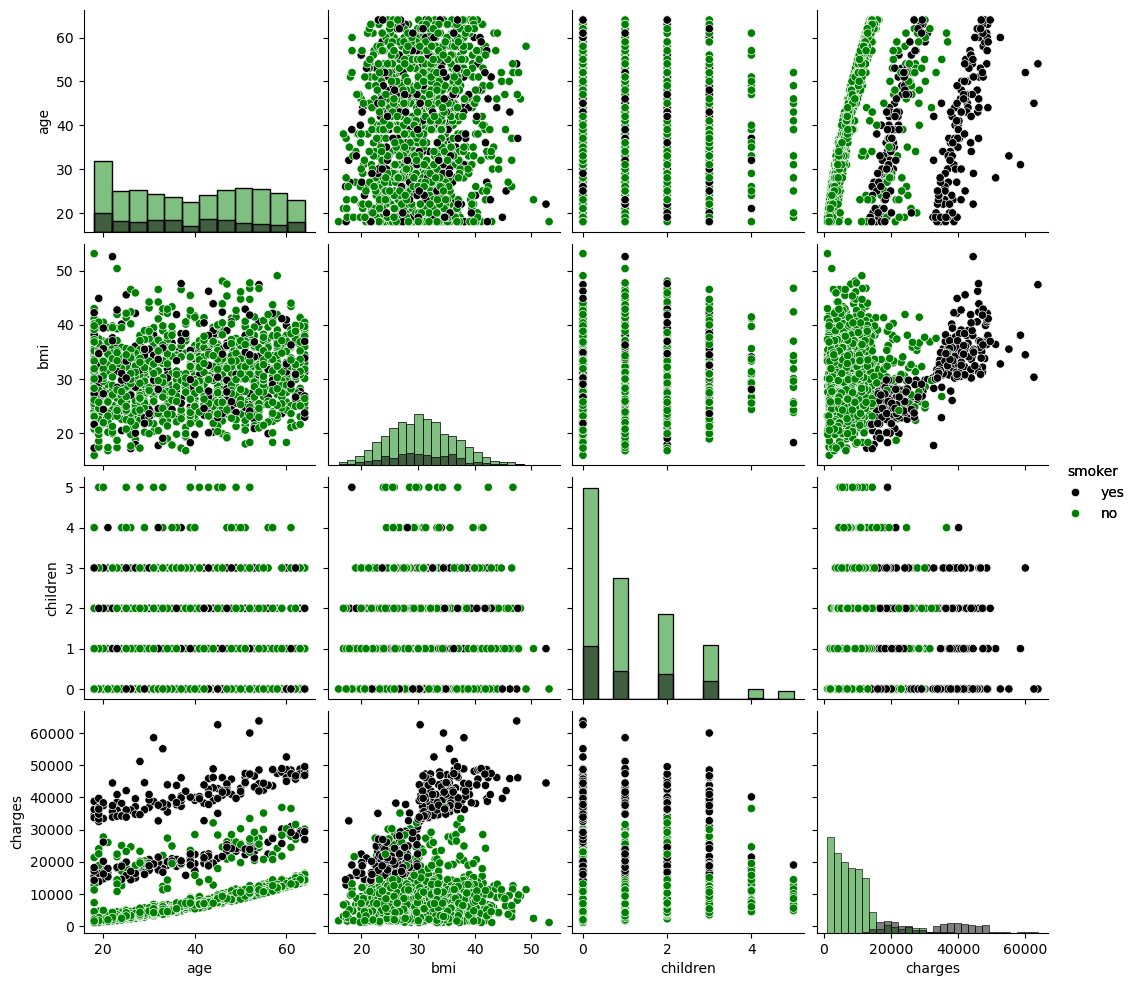

Creating pair plot with hue = region


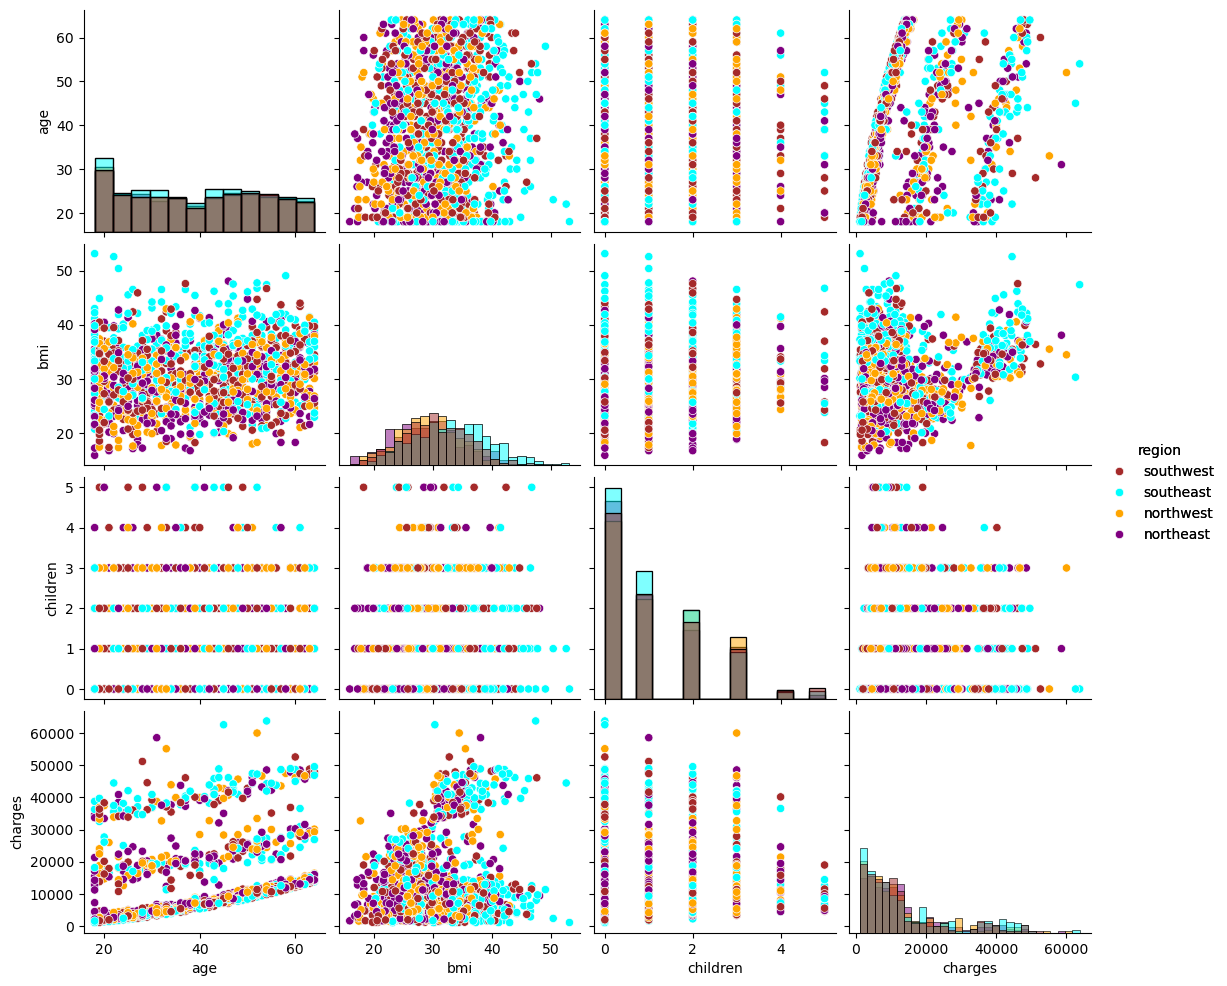

In [83]:
# Define categorical variables
categorical_cols = ["sex", "smoker", "region"]

# Define custom color palettes for each categorical variable
custom_palettes = {
    "sex": {"male": "blue", "female": "red"},
    "smoker": {"yes": "black", "no": "green"},
    "region": {"northeast": "purple", "northwest": "orange", "southeast": "cyan", "southwest": "brown"}
}

# Create a temporary copy of the dataset
temp_df = insurance.copy()

# Convert categorical variables to numeric codes and map them back to original values
for cat in categorical_cols:
    category_mapping = dict(enumerate(temp_df[cat].astype("category").cat.categories))  # Map 0 → 'no', 1 → 'yes', etc.
    temp_df[cat] = temp_df[cat].astype("category").cat.codes  # Convert to numbers
    temp_df[cat] = temp_df[cat].map(category_mapping)  # Convert numbers back to original category names

# Generate a pair plot for all numerical variables, iterating over categorical variables as `hue`
for hue_var in categorical_cols:
    print(f"Creating pair plot with hue = {hue_var}")

    g = sns.pairplot(temp_df, hue=hue_var, palette=custom_palettes.get(hue_var, "husl"), diag_kind="hist")

    # Ensure the legend appears
    g.add_legend()

    # Show the plot
    plt.show()

    # Save the plot
    g.savefig(os.path.join(path,'04_Analysis','4.02_EDA_Visuals','pairplot_all_with_{hue_var}.png'), dpi=300, bbox_inches='tight')

## Task 6. Create a categorical plot and interpret the results.

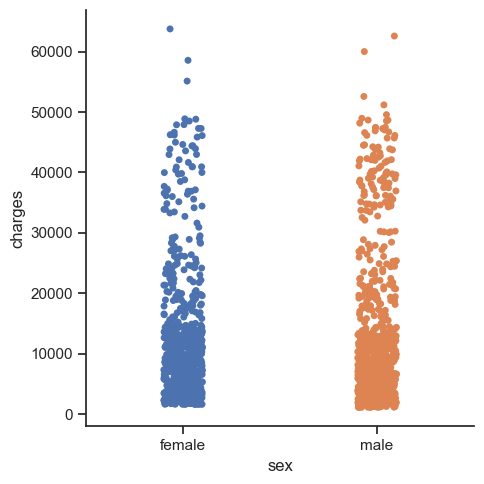

In [97]:
# Categorical plot for gender and charges 
sns.set(style="ticks")
g = sns.catplot(x="sex", y="charges", hue="sex", data=insurance)

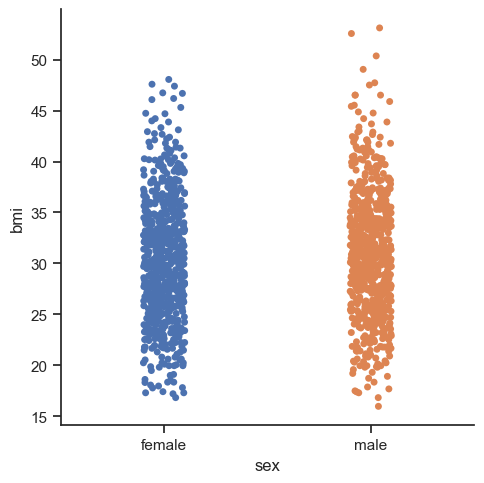

In [101]:
# Categorical plot for gender and BMI 
sns.set(style="ticks")
g = sns.catplot(x="sex", y="bmi", hue="sex", data=insurance)

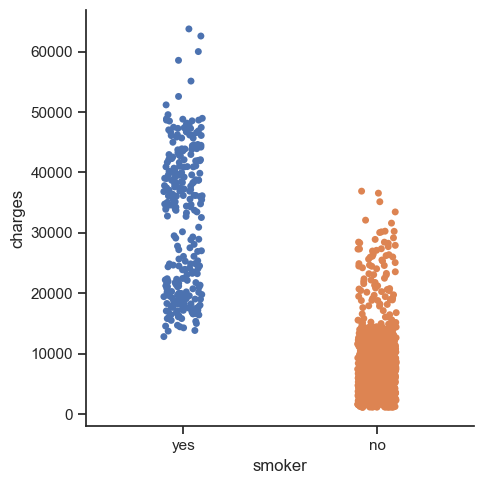

In [107]:
# Categorical plot for charges and smokers 
sns.set(style="ticks")
g = sns.catplot(x="smoker", y="charges", hue="smoker", data=insurance)

**Intepretation**. As suggested from the color pair plots already, it shows that BMI and charges are unaffected by gender - there is no difference in either variable regarding those variables. As for smoking it, as expected has a big influence on charges. 

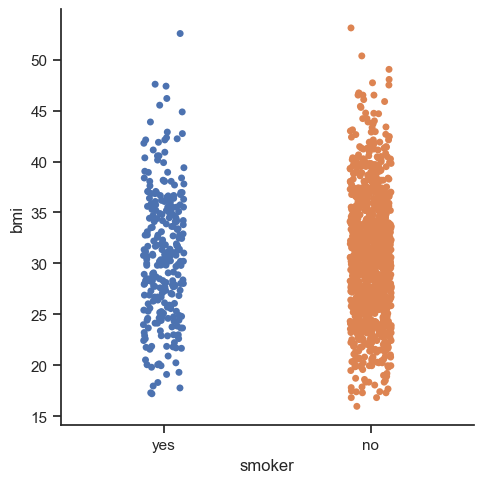

In [112]:
# Categorical plot for gender and charges 
sns.set(style="ticks")
g = sns.catplot(x="smoker", y="bmi", hue="smoker", data=insurance)

## Task 7. 
Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

**Is there evidence for the common assumption for positive linear relationship of bmi, age, smoking to health costs?**
Yes, there was a positive relation fo BMI and age to charges. However, the relationship of BMI and age to charges, though positve, wasn't fully linear. It looks like smoking is a confounding variable which increases the charges.

**How does do the health variables (smoking, BMI) differ between gender?** Do these differnces also translate to different health charges in gender? Charges and BMI dont differ between sexes, however, it needs to be further examined if gender has an influence on whether someone is a smoker or not. 

**How is obesity (BMI) connected to smoking? Is there a positve linear relationship?**
There does not seem to be a siginificant difference in BMI between smokers and non-smokers. 

**What types of regional differences can be detected on charges?**
Currently, no regional differences were obvious, except that the southeast is slightly more strongly represented in the higher BMI, age and charges. 

## Task 8. Define any hypotheses that you can at this point. 
You’ll be testing these later on.

There is a postive relationship between BMI and charges as well ages age and charges. 

In both relationships, adding smoking will increase charges further. 

Gender does not have an influence on either smoking, BMI or charges. 